# Necessary Comment : jupyter notebook

## Necessary Lighbary



In [2]:
import sqlite3
import pandas as pd
import talib
import mplfinance as mpf
import numpy as np

In [9]:
import matplotlib.pyplot as plt
# import seaborn as sns

## Database Connection

In [10]:
connection = sqlite3.connect(r"cripto.db")
# connection = sqlite3.connect(r"big_data.db")
cur = connection.cursor()
database_data = cur.execute("select * from asset order by CloseTime").fetchall()

## Dataframe

In [11]:
df = pd.DataFrame(database_data)
# df = df.head(10000)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1322,BTCBUSD,16765.75,16770.81,16764.48,16765.73,40.99442,-0.000119290816100899,1.671515e+12,6.873578e+05,1880.0,19.68150,1671514860
1,245,BTCBUSD,16754.13,16755.60,16753.41,16754.11,12.70363,-0.000119373551479167,1.671450e+12,2.128430e+05,420.0,7.32206,1671450240
2,1411,BTCBUSD,16820.70,16825.45,16813.12,16820.67,86.91679,-0.000178351673845166,1.671520e+12,1.461859e+06,2180.0,40.39891,1671520200
3,1347,BTCBUSD,16781.05,16784.23,16779.70,16781.01,58.39194,-0.000238364107137951,1.671516e+12,9.799370e+05,1768.0,32.39458,1671516360
4,336,BTCBUSD,16746.45,16747.51,16741.80,16746.40,107.27098,-0.000298570741854378,1.671456e+12,1.796215e+06,2613.0,55.70302,1671455700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1144,BTCBUSD,16702.23,16861.42,16700.80,16767.82,2038.68257,0.392702052360674,1.671504e+12,3.423084e+07,23046.0,1082.16825,1671504180
1436,1143,BTCBUSD,16637.46,16710.00,16637.46,16702.97,734.60299,0.393750007513178,1.671504e+12,1.225125e+07,9072.0,369.70206,1671504120
1437,209,BTCBUSD,16754.23,16757.03,16750.89,16754.24,39.97731,5.96864195014469e-05,1.671448e+12,6.697752e+05,1249.0,23.29745,1671448080
1438,588,BTCBUSD,16618.14,16621.19,16612.77,16618.15,84.67192,6.01752061424279e-05,1.671471e+12,1.406916e+06,1806.0,34.32521,1671470820


## Name Columns

In [12]:
df.columns = ['Id', 'Symbol', 'Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime','VolumeBUSD', 'Trades', 'BuyQuoteVolume', 'Time']
# df = df.iloc[:, 2:12]
df


,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,CloseTime,VolumeBUSD,Trades,BuyQuoteVolume,Time
0,1322,BTCBUSD,16765.75,16770.81,16764.48,16765.73,40.99442,-0.000119290816100899,1.671515e+12,6.873578e+05,1880.0,19.68150,1671514860
1,245,BTCBUSD,16754.13,16755.60,16753.41,16754.11,12.70363,-0.000119373551479167,1.671450e+12,2.128430e+05,420.0,7.32206,1671450240
2,1411,BTCBUSD,16820.70,16825.45,16813.12,16820.67,86.91679,-0.000178351673845166,1.671520e+12,1.461859e+06,2180.0,40.39891,1671520200
3,1347,BTCBUSD,16781.05,16784.23,16779.70,16781.01,58.39194,-0.000238364107137951,1.671516e+12,9.799370e+05,1768.0,32.39458,1671516360
4,336,BTCBUSD,16746.45,16747.51,16741.80,16746.40,107.27098,-0.000298570741854378,1.671456e+12,1.796215e+06,2613.0,55.70302,1671455700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1144,BTCBUSD,16702.23,16861.42,16700.80,16767.82,2038.68257,0.392702052360674,1.671504e+12,3.423084e+07,23046.0,1082.16825,1671504180
1436,1143,BTCBUSD,16637.46,16710.00,16637.46,16702.97,734.60299,0.393750007513178,1.671504e+12,1.225125e+07,9072.0,369.70206,1671504120
1437,209,BTCBUSD,16754.23,16757.03,16750.89,16754.24,39.97731,5.96864195014469e-05,1.671448e+12,6.697752e+05,1249.0,23.29745,1671448080
1438,588,BTCBUSD,16618.14,16621.19,16612.77,16618.15,84.67192,6.01752061424279e-05,1.671471e+12,1.406916e+06,1806.0,34.32521,1671470820


# Make a Candle plot

In [13]:
df = df.set_index('CloseTime')
df.index = pd.to_datetime(df.index, unit='ms')
# df = df.tail(100)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,VolumeBUSD,Trades,BuyQuoteVolume,Time
CloseTime,,,,,,,,,,,,
2022-12-20 05:41:59.999000064,1322,BTCBUSD,16765.75,16770.81,16764.48,16765.73,40.99442,-0.000119290816100899,6.873578e+05,1880.0,19.68150,1671514860
2022-12-19 11:44:59.999000064,245,BTCBUSD,16754.13,16755.60,16753.41,16754.11,12.70363,-0.000119373551479167,2.128430e+05,420.0,7.32206,1671450240
2022-12-20 07:10:59.999000064,1411,BTCBUSD,16820.70,16825.45,16813.12,16820.67,86.91679,-0.000178351673845166,1.461859e+06,2180.0,40.39891,1671520200
2022-12-20 06:06:59.999000064,1347,BTCBUSD,16781.05,16784.23,16779.70,16781.01,58.39194,-0.000238364107137951,9.799370e+05,1768.0,32.39458,1671516360
2022-12-19 13:15:59.999000064,336,BTCBUSD,16746.45,16747.51,16741.80,16746.40,107.27098,-0.000298570741854378,1.796215e+06,2613.0,55.70302,1671455700
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-20 02:43:59.999000064,1144,BTCBUSD,16702.23,16861.42,16700.80,16767.82,2038.68257,0.392702052360674,3.423084e+07,23046.0,1082.16825,1671504180
2022-12-20 02:42:59.999000064,1143,BTCBUSD,16637.46,16710.00,16637.46,16702.97,734.60299,0.393750007513178,1.225125e+07,9072.0,369.70206,1671504120
2022-12-19 11:08:59.999000064,209,BTCBUSD,16754.23,16757.03,16750.89,16754.24,39.97731,5.96864195014469e-05,6.697752e+05,1249.0,23.29745,1671448080


In [14]:
"""
means you are dropping duplicket column.
https://stackoverflow.com/questions/35084071/concat-dataframe-reindexing-only-valid-with-uniquely-valued-index-objects

"""
# df = df.head(100)
df = df.reset_index(drop=True)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,VolumeBUSD,Trades,BuyQuoteVolume,Time
0,1322,BTCBUSD,16765.75,16770.81,16764.48,16765.73,40.99442,-0.000119290816100899,6.873578e+05,1880.0,19.68150,1671514860
1,245,BTCBUSD,16754.13,16755.60,16753.41,16754.11,12.70363,-0.000119373551479167,2.128430e+05,420.0,7.32206,1671450240
2,1411,BTCBUSD,16820.70,16825.45,16813.12,16820.67,86.91679,-0.000178351673845166,1.461859e+06,2180.0,40.39891,1671520200
3,1347,BTCBUSD,16781.05,16784.23,16779.70,16781.01,58.39194,-0.000238364107137951,9.799370e+05,1768.0,32.39458,1671516360
4,336,BTCBUSD,16746.45,16747.51,16741.80,16746.40,107.27098,-0.000298570741854378,1.796215e+06,2613.0,55.70302,1671455700
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1144,BTCBUSD,16702.23,16861.42,16700.80,16767.82,2038.68257,0.392702052360674,3.423084e+07,23046.0,1082.16825,1671504180
1436,1143,BTCBUSD,16637.46,16710.00,16637.46,16702.97,734.60299,0.393750007513178,1.225125e+07,9072.0,369.70206,1671504120
1437,209,BTCBUSD,16754.23,16757.03,16750.89,16754.24,39.97731,5.96864195014469e-05,6.697752e+05,1249.0,23.29745,1671448080
1438,588,BTCBUSD,16618.14,16621.19,16612.77,16618.15,84.67192,6.01752061424279e-05,1.406916e+06,1806.0,34.32521,1671470820


In [29]:
for attr in dir(talib):
    print(attr)

ACOS
AD
ADD
ADOSC
ADX
ADXR
APO
AROON
AROONOSC
ASIN
ATAN
ATR
AVGPRICE
BBANDS
BETA
BOP
CCI
CDL2CROWS
CDL3BLACKCROWS
CDL3INSIDE
CDL3LINESTRIKE
CDL3OUTSIDE
CDL3STARSINSOUTH
CDL3WHITESOLDIERS
CDLABANDONEDBABY
CDLADVANCEBLOCK
CDLBELTHOLD
CDLBREAKAWAY
CDLCLOSINGMARUBOZU
CDLCONCEALBABYSWALL
CDLCOUNTERATTACK
CDLDARKCLOUDCOVER
CDLDOJI
CDLDOJISTAR
CDLDRAGONFLYDOJI
CDLENGULFING
CDLEVENINGDOJISTAR
CDLEVENINGSTAR
CDLGAPSIDESIDEWHITE
CDLGRAVESTONEDOJI
CDLHAMMER
CDLHANGINGMAN
CDLHARAMI
CDLHARAMICROSS
CDLHIGHWAVE
CDLHIKKAKE
CDLHIKKAKEMOD
CDLHOMINGPIGEON
CDLIDENTICAL3CROWS
CDLINNECK
CDLINVERTEDHAMMER
CDLKICKING
CDLKICKINGBYLENGTH
CDLLADDERBOTTOM
CDLLONGLEGGEDDOJI
CDLLONGLINE
CDLMARUBOZU
CDLMATCHINGLOW
CDLMATHOLD
CDLMORNINGDOJISTAR
CDLMORNINGSTAR
CDLONNECK
CDLPIERCING
CDLRICKSHAWMAN
CDLRISEFALL3METHODS
CDLSEPARATINGLINES
CDLSHOOTINGSTAR
CDLSHORTLINE
CDLSPINNINGTOP
CDLSTALLEDPATTERN
CDLSTICKSANDWICH
CDLTAKURI
CDLTASUKIGAP
CDLTHRUSTING
CDLTRISTAR
CDLUNIQUE3RIVER
CDLUPSIDEGAP2CROWS
CDLXSIDEGAP3METHODS
CEIL


In [30]:
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
print(results)
print(cols)

[0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3  

In [31]:
df['rsi'] = talib.RSI(df['Close'], timeperiod=5)
print(df['rsi'].to_string())

# Generate signals
df['rsisignal'] = 0
df.loc[df['rsi'] > 70, 'rsisignal'] = -100
df.loc[df['rsi'] < 30, 'rsisignal'] = 100
# df['rsisignal'] = df['rsisignal'].fillna(0)

print(df['rsisignal'].to_string())


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5       40.912164
6       56.549449
7       43.846899
8       25.853046
9       52.971586
10      55.858299
11      50.167955
12      27.421375
13      53.501867
14      50.412326
15      54.613089
16      49.662843
17      55.418741
18      32.450831
19      54.685738
20      51.625120
21      58.297259
22      34.948868
23      56.093750
24      51.708445
25      47.429439
26      57.957405
27      51.688694
28      35.083815
29      24.689099
30      57.442399
31      55.577761
32      58.695882
33      53.704001
34      56.419257
35      58.392408
36      30.299128
37      55.805961
38      49.516376
39      38.385413
40      54.460275
41      50.382013
42      55.873258
43      39.806670
44      29.904244
45      57.942648
46      43.295777
47      54.521258
48      48.532249
49      55.448897
50      34.712823
51      56.903577
52      55.253108
53      54.524058
54      55.795349
55      59

In [32]:
patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns['rsi'] = df['rsisignal']
patterns["Sum"] = patterns.sum(axis=1)
patterns

,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,...,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,rsi,Sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0,0,0,0,0,0,0,0,0,100,...,0,0,0,0,0,0,0,0,0,100
1436,0,0,0,0,0,0,0,0,0,100,...,0,0,0,0,0,0,0,0,0,200
1437,0,0,0,0,0,0,0,0,0,0,...,0,100,0,0,0,0,0,0,0,400
1438,0,0,0,0,0,0,0,0,0,0,...,0,100,0,0,0,0,0,0,0,900


# Make Dataframe From Binance Data

## Get Result and All the candlesticks from Ta-Lib

## Frame all candle and add sum of the candle result

## Saferate Numeracdata from dataframe

In [33]:
df = df.drop(['Symbol', 'Id', 'Time'], axis=1)

In [34]:
# df = df.iloc[:,0:10]
# x

## Combine two Dataframe

In [35]:
df = df.astype(float)


In [36]:
df = df.add(patterns, fill_value=0)
df

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,...,Close,High,Low,Open,Sum,Trades,VolumeBTC,VolumeBUSD,rsi,rsisignal
0,19.68150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16765.73,16770.81,16764.48,16765.75,0.0,1880.0,40.99442,6.873578e+05,0.000000,0.0
1,7.32206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16754.11,16755.60,16753.41,16754.13,0.0,420.0,12.70363,2.128430e+05,0.000000,0.0
2,40.39891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16820.67,16825.45,16813.12,16820.70,0.0,2180.0,86.91679,1.461859e+06,0.000000,0.0
3,32.39458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16781.01,16784.23,16779.70,16781.05,0.0,1768.0,58.39194,9.799370e+05,0.000000,0.0
4,55.70302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16746.40,16747.51,16741.80,16746.45,0.0,2613.0,107.27098,1.796215e+06,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1082.16825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16767.82,16861.42,16700.80,16702.23,100.0,23046.0,2038.68257,3.423084e+07,57.477622,0.0
1436,369.70206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16702.97,16710.00,16637.46,16637.46,200.0,9072.0,734.60299,1.225125e+07,53.444436,0.0
1437,23.29745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16754.24,16757.03,16750.89,16754.23,400.0,1249.0,39.97731,6.697752e+05,56.463461,0.0
1438,34.32521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16618.15,16621.19,16612.77,16618.14,900.0,1806.0,84.67192,1.406916e+06,46.465743,0.0


## Make a plot to see the sum

0          0
1          0
2          0
3          0
4          0
        ... 
1435     200
1436     400
1437     800
1438    1800
1439    1800
Length: 1440, dtype: int64


<AxesSubplot: >

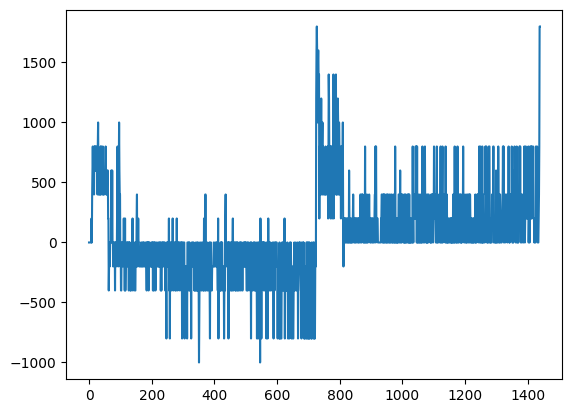

In [37]:
all_pats = patterns.sum(axis=1)
print(all_pats)
all_pats.plot()

In [38]:
# sns.pairplot(df.head(10000))

## X paramiter for feeding Model

In [39]:
X = df.drop(['Sum','rsi','rsisignal'], axis=1)
X

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,...,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,Change,Close,High,Low,Open,Trades,VolumeBTC,VolumeBUSD
0,19.68150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000119,16765.73,16770.81,16764.48,16765.75,1880.0,40.99442,6.873578e+05
1,7.32206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000119,16754.11,16755.60,16753.41,16754.13,420.0,12.70363,2.128430e+05
2,40.39891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000178,16820.67,16825.45,16813.12,16820.70,2180.0,86.91679,1.461859e+06
3,32.39458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000238,16781.01,16784.23,16779.70,16781.05,1768.0,58.39194,9.799370e+05
4,55.70302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000299,16746.40,16747.51,16741.80,16746.45,2613.0,107.27098,1.796215e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1082.16825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.392702,16767.82,16861.42,16700.80,16702.23,23046.0,2038.68257,3.423084e+07
1436,369.70206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.393750,16702.97,16710.00,16637.46,16637.46,9072.0,734.60299,1.225125e+07
1437,23.29745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000060,16754.24,16757.03,16750.89,16754.23,1249.0,39.97731,6.697752e+05
1438,34.32521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000060,16618.15,16621.19,16612.77,16618.14,1806.0,84.67192,1.406916e+06


## Y paramiter for feedind Model

In [40]:
y = df['Sum']
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
1435    100.0
1436    200.0
1437    400.0
1438    900.0
1439    900.0
Name: Sum, Length: 1440, dtype: float64

## Split

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.1)

## Use Tensorflow

In [42]:
X_train.shape

(1296, 70)

In [43]:
len(X_train)

1296

In [44]:
y_train.shape

(1296,)

In [45]:
import tensorflow as tf
model = tf.keras.models.Sequential()

In [46]:
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1))


In [47]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [48]:
model.fit(X_train,y_train, epochs=500)

Epoch 1/500
41/41 [==============================] - 2s 5ms/step - loss: 3957069056.0000 - accuracy: 0.1628
Epoch 2/500
41/41 [==============================] - 0s 5ms/step - loss: 5288304128.0000 - accuracy: 0.1829
Epoch 3/500
41/41 [==============================] - 0s 5ms/step - loss: 1200689152.0000 - accuracy: 0.1836
Epoch 4/500
41/41 [==============================] - 0s 5ms/step - loss: 614754880.0000 - accuracy: 0.1682
Epoch 5/500
41/41 [==============================] - 0s 5ms/step - loss: 75784752.0000 - accuracy: 0.1142
Epoch 6/500
41/41 [==============================] - 0s 5ms/step - loss: 3148895.5000 - accuracy: 0.1644
Epoch 7/500
41/41 [==============================] - 1s 14ms/step - loss: 260304.0312 - accuracy: 0.0772
Epoch 8/500
41/41 [==============================] - 0s 6ms/step - loss: 798247.6250 - accuracy: 0.1427
Epoch 9/500
41/41 [==============================] - 0s 6ms/step - loss: 1170627.0000 - accuracy: 0.1929
Epoch 10/500
41/41 [========================

41/41 [==============================] - 0s 5ms/step - loss: 36659.6523 - accuracy: 0.0810
Epoch 79/500
41/41 [==============================] - 0s 5ms/step - loss: 2019076.0000 - accuracy: 0.1721
Epoch 80/500
41/41 [==============================] - 0s 7ms/step - loss: 796843.1250 - accuracy: 0.1875
Epoch 81/500
41/41 [==============================] - 0s 7ms/step - loss: 670599.9375 - accuracy: 0.1713
Epoch 82/500
41/41 [==============================] - 0s 5ms/step - loss: 10604813.0000 - accuracy: 0.1528
Epoch 83/500
41/41 [==============================] - 0s 5ms/step - loss: 35280260.0000 - accuracy: 0.1242
Epoch 84/500
41/41 [==============================] - 0s 5ms/step - loss: 1172574208.0000 - accuracy: 0.1659
Epoch 85/500
41/41 [==============================] - 0s 5ms/step - loss: 313984288.0000 - accuracy: 0.1867
Epoch 86/500
41/41 [==============================] - 0s 5ms/step - loss: 16167887.0000 - accuracy: 0.1991
Epoch 87/500
41/41 [==============================] - 0

41/41 [==============================] - 0s 5ms/step - loss: 50169.3125 - accuracy: 0.1196
Epoch 156/500
41/41 [==============================] - 0s 6ms/step - loss: 180227.0781 - accuracy: 0.1613
Epoch 157/500
41/41 [==============================] - 0s 5ms/step - loss: 898250.3750 - accuracy: 0.1736
Epoch 158/500
41/41 [==============================] - 0s 5ms/step - loss: 104256.7891 - accuracy: 0.0810
Epoch 159/500
41/41 [==============================] - 0s 4ms/step - loss: 35530.5234 - accuracy: 0.1034
Epoch 160/500
41/41 [==============================] - 0s 7ms/step - loss: 26466.9727 - accuracy: 0.0502
Epoch 161/500
41/41 [==============================] - 0s 6ms/step - loss: 40738.7578 - accuracy: 0.1173
Epoch 162/500
41/41 [==============================] - 0s 5ms/step - loss: 484189.0312 - accuracy: 0.1312
Epoch 163/500
41/41 [==============================] - 0s 5ms/step - loss: 3320220.0000 - accuracy: 0.1620
Epoch 164/500
41/41 [==============================] - 0s 5ms/s

41/41 [==============================] - 0s 5ms/step - loss: 19072.0859 - accuracy: 0.0772
Epoch 233/500
41/41 [==============================] - 0s 5ms/step - loss: 18522.1504 - accuracy: 0.1127
Epoch 234/500
41/41 [==============================] - 0s 5ms/step - loss: 20324.4395 - accuracy: 0.1265
Epoch 235/500
41/41 [==============================] - 0s 5ms/step - loss: 20309.3770 - accuracy: 0.1157
Epoch 236/500
41/41 [==============================] - 0s 7ms/step - loss: 17568.1250 - accuracy: 0.1003
Epoch 237/500
41/41 [==============================] - 0s 6ms/step - loss: 16897.7324 - accuracy: 0.1049
Epoch 238/500
41/41 [==============================] - 0s 5ms/step - loss: 17237.0176 - accuracy: 0.0810
Epoch 239/500
41/41 [==============================] - 0s 6ms/step - loss: 21168.7598 - accuracy: 0.0995
Epoch 240/500
41/41 [==============================] - 0s 6ms/step - loss: 31781.5625 - accuracy: 0.1582
Epoch 241/500
41/41 [==============================] - 0s 5ms/step - 

Epoch 310/500
41/41 [==============================] - 0s 4ms/step - loss: 19236.8867 - accuracy: 0.1597
Epoch 311/500
41/41 [==============================] - 0s 4ms/step - loss: 77656.8125 - accuracy: 0.1883
Epoch 312/500
41/41 [==============================] - 0s 5ms/step - loss: 301297.4688 - accuracy: 0.1744
Epoch 313/500
41/41 [==============================] - 0s 5ms/step - loss: 471808.7812 - accuracy: 0.1744
Epoch 314/500
41/41 [==============================] - 0s 5ms/step - loss: 14426109.0000 - accuracy: 0.1705
Epoch 315/500
41/41 [==============================] - 0s 7ms/step - loss: 14954586.0000 - accuracy: 0.1944
Epoch 316/500
41/41 [==============================] - 0s 8ms/step - loss: 4485303.5000 - accuracy: 0.1929
Epoch 317/500
41/41 [==============================] - 0s 7ms/step - loss: 35570.2891 - accuracy: 0.1196
Epoch 318/500
41/41 [==============================] - 0s 5ms/step - loss: 27578.5059 - accuracy: 0.0633
Epoch 319/500
41/41 [========================

41/41 [==============================] - 0s 4ms/step - loss: 19839.7930 - accuracy: 0.0640
Epoch 389/500
41/41 [==============================] - 0s 4ms/step - loss: 16320.8398 - accuracy: 0.0864
Epoch 390/500
41/41 [==============================] - 0s 5ms/step - loss: 12527.3994 - accuracy: 0.0795
Epoch 391/500
41/41 [==============================] - 0s 5ms/step - loss: 11010.5811 - accuracy: 0.1373
Epoch 392/500
41/41 [==============================] - 0s 5ms/step - loss: 8606.6963 - accuracy: 0.1304
Epoch 393/500
41/41 [==============================] - 0s 5ms/step - loss: 7192.3320 - accuracy: 0.1373
Epoch 394/500
41/41 [==============================] - 0s 5ms/step - loss: 6873.5356 - accuracy: 0.1458
Epoch 395/500
41/41 [==============================] - 0s 5ms/step - loss: 5810.5190 - accuracy: 0.1366
Epoch 396/500
41/41 [==============================] - 0s 4ms/step - loss: 8958.3887 - accuracy: 0.1566
Epoch 397/500
41/41 [==============================] - 0s 5ms/step - loss:

41/41 [==============================] - 0s 5ms/step - loss: 2727.9121 - accuracy: 0.1489
Epoch 467/500
41/41 [==============================] - 0s 5ms/step - loss: 42414.0352 - accuracy: 0.1489
Epoch 468/500
41/41 [==============================] - 0s 5ms/step - loss: 12412.3916 - accuracy: 0.1404
Epoch 469/500
41/41 [==============================] - 0s 4ms/step - loss: 8708.7588 - accuracy: 0.1566
Epoch 470/500
41/41 [==============================] - 0s 11ms/step - loss: 5001.9219 - accuracy: 0.1389
Epoch 471/500
41/41 [==============================] - 0s 11ms/step - loss: 3864.8438 - accuracy: 0.1497
Epoch 472/500
41/41 [==============================] - 0s 10ms/step - loss: 48673.2617 - accuracy: 0.1026
Epoch 473/500
41/41 [==============================] - 0s 5ms/step - loss: 15928.4277 - accuracy: 0.1520
Epoch 474/500
41/41 [==============================] - 0s 4ms/step - loss: 12327.2979 - accuracy: 0.1427
Epoch 475/500
41/41 [==============================] - 0s 6ms/step - l

In [49]:
import joblib
# model = model.fit(X_train, y_train)
joblib.dump(model, "btcbusd_trand_predictor_tf.joblib")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-23 13:32:18         1791
metadata.json                                  2023-03-23 13:32:18           64
variables.h5                                   2023-03-23 13:32:18      1033432


['btcbusd_trand_predictor_tf.joblib']

In [50]:
model = joblib.load("btcbusd_trand_predictor_tf.joblib")
predictions = model.predict(X_test)
predictions[:10]

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-23 13:32:18         1791
metadata.json                                  2023-03-23 13:32:18           64
variables.h5                                   2023-03-23 13:32:18      1033432
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
5/5 [==============================] - 0s 3ms/step


array([[  -6.0318146],
       [ -77.31614  ],
       [ -65.37742  ],
       [  86.729706 ],
       [ 193.87257  ],
       [-261.84653  ],
       [-103.07557  ],
       [  11.60171  ],
       [ -60.63222  ],
       [ 203.56644  ]], dtype=float32)

In [51]:
y_test[:10]

C:\Users\user\AppData\Local\Temp\ipykernel_9060\2588316582.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:10]


3         0.0
120       0.0
604    -100.0
1181    100.0
746     200.0
546    -500.0
85     -100.0
1340    100.0
458       0.0
71      300.0
Name: Sum, dtype: float64

In [52]:
from dataframe import GetDataframe
symbol = "BTCBUSD"

df = GetDataframe().get_minute_data(symbol, 1, 5)
df = df.iloc[:,0:10]
df.astype(float)
# df = df.drop(columns=['symbol','VolumeBUSD', 'CloseTime'])
# df = df.iloc[0]
# print(df)
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
# print(results)
# print(cols)

patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns["Sum"] = patterns.sum(axis=1)
patterns
df = df.add(patterns, fill_value=0)
df = df.drop(['CloseTime', 'Sum'], axis=1)
df = df.iloc[-2]
# print(df)
print(model.predict(pd.DataFrame(df).transpose()))

1/1 [==============================] - 0s 45ms/step
[[566.9661]]
